In [5]:
### relative value, maturity arbitarge

import pandas as pd
import numpy as np
import os

data_path= r"/Users/mohamedabdellahi/Desktop/Trust the process/0.projects/output_RV.xlsx"
df=pd.read_excel(data_path, sheet_name= "YLD_CNV_MID")


In [13]:
missing_percentageRows= df.isnull().mean(axis= 1) > 0.2
missing_percentageRows

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

In [73]:
df=pd.read_excel(data_path, sheet_name= "YLD_CNV_MID")

# Drop columns with more than 30% missing data 
print(f"size before cleaning {df.shape}")
df = df.loc[:, df.isnull().mean() < 0.2] # i will take all the rows, but only columns where there is less 20% missing data 

# Drop rows with more than 20% missing data
df = df.loc[df.isnull().mean(axis=1) < 0.2]
print(f"size after droping more than 30% missed data's Columns, and more than 20% missed data in rows {df.shape} \n le nomnbre de valeurs manquantes:  {df.isnull().sum().sum()} ")
nan_per_column = df.isna().sum()
print(nan_per_column) 

# Fill remaining missing data
df = df.ffill().bfill()  # Forward and backward fill

size before cleaning (267, 43)
size after droping more than 30% missed data's Columns, and more than 20% missed data in rows (267, 40) 
 le nomnbre de valeurs manquantes:  83 
AT0000A24UY3 Corp     0
BE0002237064 Corp     0
BE0002433085 Corp    13
BE0002629104 Corp     0
BE0002850312 Corp     0
BE6321718346 Corp     0
DE000A14KJF5 Corp     0
DE000A182VT2 Corp     0
DE000A190NE4 Corp     0
DE000A19NS93 Corp     0
DE000A19X8A4 Corp     0
DE000A1ZY989 Corp     0
DE000A1ZZ028 Corp     0
DE000A289NE4 Corp     0
DE000A289NX4 Corp     0
DE000A289RN6 Corp     0
DE000A289XJ2 Corp     0
DE000A2AAL31 Corp     0
DE000A2DADM7 Corp     0
DE000A2RWZZ6 Corp     0
DE000A2RYD91 Corp     0
DE000A2YNZW8 Corp     0
DE000A30VPL3 Corp     0
DE000A3E5L98 Corp     0
DE000A3H2TW4 Corp     0
DE000A3KNP88 Corp     0
DE000A3LBGG1 Corp     0
DE000A3LBMY2 Corp     0
DE000A3LGGL0 Corp     0
DE000A3LH6T7 Corp     0
DE000A3LHK72 Corp     0
DE000A3LQ9S2 Corp     0
DE000A3LSYG8 Corp     0
DE000A3LT431 Corp    17
DE000A3L

In [48]:
from scipy.stats import zscore
z_scores = zscore(df, nan_policy='omit')


# Get columns with outliers
outlier_columns = df.columns[(abs(z_scores) > 3).any(axis=0)]

# Get number of outliers in each column
num_outliers = (abs(z_scores) > 3).sum(axis=0)

# Print results
print("Number of outliers per column:")
print(num_outliers[num_outliers > 0])  # Show only columns with outliers
print("\nColumns with outliers (z > 3):", list(outlier_columns))

Number of outliers per column:
DE000A289NE4 Corp    1
ES0205032024 Corp    6
dtype: int64

Columns with outliers (z > 3): ['DE000A289NE4 Corp', 'ES0205032024 Corp']


In [45]:
z_scores

,AT0000A24UY3 Corp,BE0002237064 Corp,BE0002433085 Corp,BE0002629104 Corp,BE0002850312 Corp,BE6321718346 Corp,DE000A14KJF5 Corp,DE000A182VT2 Corp,DE000A190NE4 Corp,DE000A19NS93 Corp,...,DE000A3LHK72 Corp,DE000A3LQ9S2 Corp,DE000A3LSYG8 Corp,DE000A3LT431 Corp,DE000A3LWGE2 Corp,DE000A3MP4T1 Corp,ES0205032024 Corp,ES0205046008 Corp,ES0211845294 Corp,ES0305523005 Corp
0,0.105953,0.369212,-0.060911,0.788706,1.897657,0.475881,-1.319913,0.274330,0.878904,0.574841,...,0.567293,0.931454,-0.046125,-0.444661,0.732597,0.583713,0.431203,-0.056344,0.820542,0.169059
1,0.083623,0.499170,-0.060911,0.876741,1.913972,0.617095,-1.257034,0.407678,0.820632,0.688033,...,0.690184,1.080929,0.110592,-0.444661,0.732597,0.686170,0.575796,0.300051,0.709089,0.259507
2,0.083623,0.617314,-0.060911,0.941473,1.894031,0.690644,-1.181580,0.516533,0.867978,0.776812,...,0.780304,1.048044,0.297781,-0.444661,0.732597,0.813021,0.634414,0.475739,0.820542,0.349955
3,-0.047170,0.531660,-0.060911,0.892277,1.912159,0.643573,-1.261226,0.475713,0.532911,0.739081,...,0.709301,0.958360,0.171537,-0.444661,0.732597,0.756914,0.544532,0.360287,0.840806,0.251526
4,-0.171583,0.251067,-0.060911,0.604869,1.895844,0.381739,-1.613345,0.149146,0.183275,0.494940,...,0.526330,0.635495,-0.220254,-0.444661,0.732597,0.447104,0.204544,0.013931,0.692203,-0.081002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-1.603922,-1.627425,-0.045829,-1.350023,-1.428858,-1.586433,-1.525316,-1.132627,-1.437432,-1.582476,...,-1.614706,-0.844300,-0.725229,-0.737658,-0.918526,-1.455665,-3.058567,-0.297287,-2.073838,-1.352592
263,-1.712384,-1.665822,-0.146374,-1.378505,-1.434296,-1.718821,-1.504356,-1.135348,-1.481137,-1.584696,...,-1.652938,-0.886153,-0.821000,-0.794629,-0.941688,-1.462983,-3.222700,-0.598466,-2.421704,-1.427079
264,-1.619872,-1.671729,-0.131292,-1.362969,-1.494119,-1.695285,-1.504356,-1.132627,-1.470211,-1.604671,...,-1.663862,-0.898111,-0.842767,-0.912642,-0.964850,-1.472741,-3.015580,-0.648663,-2.148139,-1.429739
265,-1.642203,-1.692404,-0.251946,-1.414754,-1.552129,-1.683517,-1.730719,-1.173448,-1.517557,-1.620207,...,-1.696633,-0.886153,-0.908065,-0.937058,-0.984703,-1.504454,-3.203160,-0.824350,-2.313629,-1.554770


In [76]:
#######@ outliers treatement:
from scipy.stats import zscore
import numpy as np
from statsmodels.tsa.stattools import adfuller
# Compute z-scores
z_scores = zscore(df, nan_policy='omit')

# Replace outliers with NaN

df[(np.abs(z_scores) > 3)] = np.nan
nan_per_column = df.isna().sum()
#print(nan_per_column) 
# Fill NaNs resulting from outlier removal
df = df.ffill().bfill() 


## normalization:

df_normalized = (df - df.mean()) / df.std()
print("Maximum deviation from 0:", abs(df_normalized.mean()).max())
## after normalization 

## statistical tests:



# Test one bond for stationarity (replace 'Bond_1' with the actual column name)
# Test stationarity of a single bond's yield spread
def adfuller_bond(data):
    ## data is normalized dataframe
    for bond in data.columns:

        result = adfuller(data[bond].dropna())
        # Print the results
        print(f"Bond: {bond}")
        print(f"  ADF Statistic: {result[0]}")
        print(f"  p-value: {result[1]}")
        
        # Interpretation
        if result[1] <= 0.05:
            print("  The series is stationary (reject the null hypothesis).")
        else:
            print("  The series is non-stationary (fail to reject the null hypothesis).")
        print("-" * 50)

adfuller_bond(df_normalized)

Maximum deviation from 0: 1.1561288755310058e-14
Bond: AT0000A24UY3 Corp
  ADF Statistic: 0.1501619552147055
  p-value: 0.9693236489390276
  The series is non-stationary (fail to reject the null hypothesis).
--------------------------------------------------
Bond: BE0002237064 Corp
  ADF Statistic: 0.4215531660518258
  p-value: 0.9822833032306098
  The series is non-stationary (fail to reject the null hypothesis).
--------------------------------------------------
Bond: BE0002433085 Corp
  ADF Statistic: -1.8519865994586917
  p-value: 0.3549739767323077
  The series is non-stationary (fail to reject the null hypothesis).
--------------------------------------------------
Bond: BE0002629104 Corp
  ADF Statistic: -0.0441801819666933
  p-value: 0.9547223083502413
  The series is non-stationary (fail to reject the null hypothesis).
--------------------------------------------------
Bond: BE0002850312 Corp
  ADF Statistic: -1.3999740599518358
  p-value: 0.5822885544452516
  The series is no

In [88]:
## here is a function that will make us drop what is not stationnary

def adfuller_bond(data):
    """
    Perform the ADF test on each column of the DataFrame and identify non-stationary columns.

    Parameters:
        data (pd.DataFrame): The normalized DataFrame of bonds.

    Returns:
        non_stationary_bonds (list): A list of column names (bonds) that are non-stationary.
    """
    non_stationary_bonds = []
    stationary_bonds = []
    summary = []

    for bond in data.columns:
        result = adfuller(data[bond].dropna())
        bond_name = f"Bond: {bond}"
        adf_stat = result[0]
        p_value = result[1]

        # Collect results for summary
        summary.append({
            "Bond": bond,
            "ADF Statistic": adf_stat,
            "p-value": p_value,
            "Stationary": p_value <= 0.05
        })

        # Identify non-stationary bonds
        if p_value > 0.05:
            non_stationary_bonds.append(bond)
        else:
            stationary_bonds.append(bond)

    # Print summary table
    print("\nADF Test Summary:")
    print("-" * 50)
    for item in summary:
        print(
            f"{item['Bond']} | ADF Statistic: {item['ADF Statistic']:.3f} | "
            f"p-value: {item['p-value']:.3f} | "
            f"{'Stationary' if item['Stationary'] else 'Non-Stationary'}"
        )
    print("-" * 50)

    # Print non-stationary bonds
    print("\nNon-Stationary Bonds:")
    if non_stationary_bonds:
        print(", ".join(non_stationary_bonds))
    else:
        print("All bonds are stationary.")

    return non_stationary_bonds



In [89]:
##@ we found that our columns aren't stationnary.
##@ so we will try to stablize and get stationnarity
df_normalized_lag1= df_normalized.diff().dropna()

non_stationary_bonds = adfuller_bond(df_normalized_lag1)

# Drop non-stationary bonds from the dataset
df_filtered = df_normalized_lag1.drop(columns=non_stationary_bonds)


ADF Test Summary:
--------------------------------------------------
AT0000A24UY3 Corp | ADF Statistic: -14.857 | p-value: 0.000 | Stationary
BE0002237064 Corp | ADF Statistic: -6.539 | p-value: 0.000 | Stationary
BE0002433085 Corp | ADF Statistic: -8.893 | p-value: 0.000 | Stationary
BE0002629104 Corp | ADF Statistic: -6.548 | p-value: 0.000 | Stationary
BE0002850312 Corp | ADF Statistic: -6.817 | p-value: 0.000 | Stationary
BE6321718346 Corp | ADF Statistic: -8.831 | p-value: 0.000 | Stationary
DE000A14KJF5 Corp | ADF Statistic: -20.983 | p-value: 0.000 | Stationary
DE000A182VT2 Corp | ADF Statistic: -17.438 | p-value: 0.000 | Stationary
DE000A190NE4 Corp | ADF Statistic: -9.342 | p-value: 0.000 | Stationary
DE000A19NS93 Corp | ADF Statistic: -12.817 | p-value: 0.000 | Stationary
DE000A19X8A4 Corp | ADF Statistic: -17.487 | p-value: 0.000 | Stationary
DE000A1ZY989 Corp | ADF Statistic: -7.952 | p-value: 0.000 | Stationary
DE000A1ZZ028 Corp | ADF Statistic: -3.693 | p-value: 0.004 | 

In [91]:
## after making first differencing, the series are stationnarised

## we will filter only the bonds that are stationnary 
# Filter the dataset to include only stationary bonds
stationary_bonds = [bond for bond in df_normalized_lag1.columns if bond not in non_stationary_bonds]
df_stationary_filtered = df_normalized_lag1[stationary_bonds]

#We’ll calculate the spreads between every possible pair of bonds. Spreads are the difference between the yields of two bonds.


,AT0000A24UY3 Corp,BE0002237064 Corp,BE0002433085 Corp,BE0002629104 Corp,BE0002850312 Corp,BE6321718346 Corp,DE000A14KJF5 Corp,DE000A182VT2 Corp,DE000A190NE4 Corp,DE000A19NS93 Corp,...,DE000A3LHK72 Corp,DE000A3LQ9S2 Corp,DE000A3LSYG8 Corp,DE000A3LT431 Corp,DE000A3LWGE2 Corp,DE000A3MP4T1 Corp,ES0205032024 Corp,ES0205046008 Corp,ES0211845294 Corp,ES0305523005 Corp
1,-0.022289,0.129715,0.000000,0.087870,0.016285,0.140949,0.062761,0.133098,-0.058163,0.112980,...,0.122661,0.149194,0.156423,0.000000,0.000000,0.102265,0.149877,0.355727,-0.111243,0.090278
2,0.000000,0.117923,0.000000,0.064610,-0.019904,0.073411,0.075313,0.108651,0.047258,0.088612,...,0.089951,-0.032823,0.186838,0.000000,0.000000,0.126613,0.060761,0.175358,0.111243,0.090278
3,-0.130548,-0.085494,0.000000,-0.049104,0.018094,-0.046983,-0.079497,-0.040744,-0.334440,-0.037660,...,-0.070871,-0.089516,-0.126007,0.000000,0.000000,-0.056002,-0.093167,-0.115236,0.020226,-0.098244
4,-0.124179,-0.280066,0.000000,-0.286869,-0.016285,-0.261344,-0.351459,-0.325954,-0.348980,-0.243683,...,-0.182628,-0.322259,-0.391057,0.000000,0.000000,-0.309229,-0.352413,-0.345707,-0.148324,-0.331905
5,0.136916,0.170988,0.000000,0.147311,-0.003619,0.132140,0.238490,0.181991,0.229018,0.126272,...,0.174451,0.187985,0.247669,0.000000,0.000000,0.172876,0.238993,0.270553,0.037081,0.209764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-0.073234,-0.070754,0.095339,-0.054273,-0.075995,0.096903,0.062761,-0.089637,-0.058163,-0.037660,...,-0.016355,-0.077581,-0.130352,-0.162471,-0.148620,-0.034088,0.000000,-0.235481,-0.232600,-0.047794
263,-0.108259,-0.038325,-0.100356,-0.028428,-0.005428,-0.132140,0.020920,-0.002716,-0.043623,-0.002215,...,-0.038161,-0.041774,-0.095592,-0.056865,-0.023119,-0.007305,0.000000,-0.300614,-0.347214,-0.074347
264,0.092338,-0.005896,0.015053,0.015506,-0.059711,0.023492,0.000000,0.002716,0.010906,-0.019938,...,-0.010903,-0.011936,-0.021725,-0.117791,-0.023119,-0.009739,0.000000,-0.050102,0.273052,-0.002655
265,-0.022289,-0.020636,-0.120428,-0.051688,-0.057901,0.011746,-0.225938,-0.040744,-0.047258,-0.015507,...,-0.032710,0.011936,-0.065176,-0.024371,-0.019816,-0.031653,0.000000,-0.175358,-0.165179,-0.124796


Correlation Matrix:
                   AT0000A24UY3 Corp  BE0002237064 Corp  BE0002433085 Corp  \
AT0000A24UY3 Corp           1.000000           0.432954           0.301475   
BE0002237064 Corp           0.432954           1.000000           0.642297   
BE0002433085 Corp           0.301475           0.642297           1.000000   
BE0002629104 Corp           0.433406           0.935575           0.644156   
BE0002850312 Corp           0.233746           0.327093           0.339395   
BE6321718346 Corp           0.193377           0.530844           0.251137   
DE000A14KJF5 Corp           0.197239           0.470931           0.309039   
DE000A182VT2 Corp           0.348544           0.843134           0.686579   
DE000A190NE4 Corp           0.415930           0.841857           0.551282   
DE000A19NS93 Corp           0.437711           0.913919           0.589281   
DE000A19X8A4 Corp           0.348071           0.828589           0.682048   
DE000A1ZY989 Corp           0.092128        

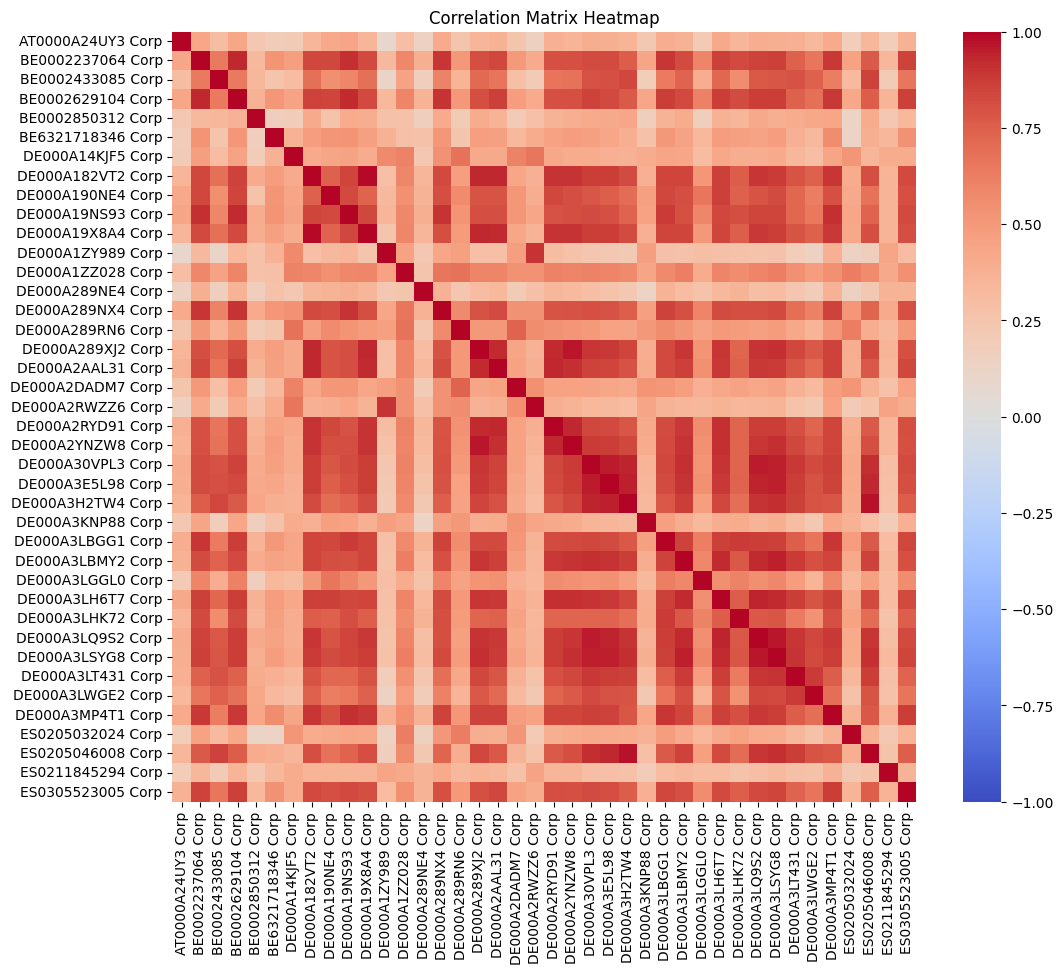

In [96]:
##@ we start the analysis:
import seaborn as sns
import matplotlib.pyplot as plt
## correlation
# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Display the top correlations
print("Correlation Matrix:")
print(correlation_matrix)

# Define correlation threshold
correlation_threshold = 0.8


# Find highly correlated pairs
high_corr_pairs = []
for bond_1 in correlation_matrix.columns:
    for bond_2 in correlation_matrix.columns:
        if bond_1 != bond_2 and correlation_matrix.loc[bond_1, bond_2] > correlation_threshold:
            high_corr_pairs.append((bond_1, bond_2, correlation_matrix.loc[bond_1, bond_2]))

# Remove duplicates (e.g., (Bond_1, Bond_2) is the same as (Bond_2, Bond_1))
high_corr_pairs = list(set(tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_pairs))

# Create a DataFrame from the high correlation pairs
df_high_corr_pairs = pd.DataFrame(high_corr_pairs, columns=["Bond_1", "Bond_2", "Correlation"])

# Sort the DataFrame by Correlation (optional)
df_high_corr_pairs = df_high_corr_pairs.sort_values(by="Correlation", ascending=False)

# Display the DataFrame
print(df_high_corr_pairs)

# Export to Excel
#df_high_corr_pairs.to_excel("high_correlation_pairs.xlsx", index=False)


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [97]:
df_high_corr_pairs

,Bond_1,Bond_2,Correlation
199,DE000A182VT2 Corp,DE000A19X8A4 Corp,0.985805
205,DE000A3H2TW4 Corp,ES0205046008 Corp,0.969844
207,DE000A289XJ2 Corp,DE000A2YNZW8 Corp,0.964190
98,DE000A3LQ9S2 Corp,DE000A3LSYG8 Corp,0.962635
64,DE000A30VPL3 Corp,DE000A3E5L98 Corp,0.956947
...,...,...,...
1,DE000A289NX4 Corp,DE000A289XJ2 Corp,0.804131
149,DE000A289NX4 Corp,DE000A3E5L98 Corp,0.803122
145,DE000A289NX4 Corp,DE000A2YNZW8 Corp,0.801832
186,BE0002433085 Corp,DE000A30VPL3 Corp,0.801624


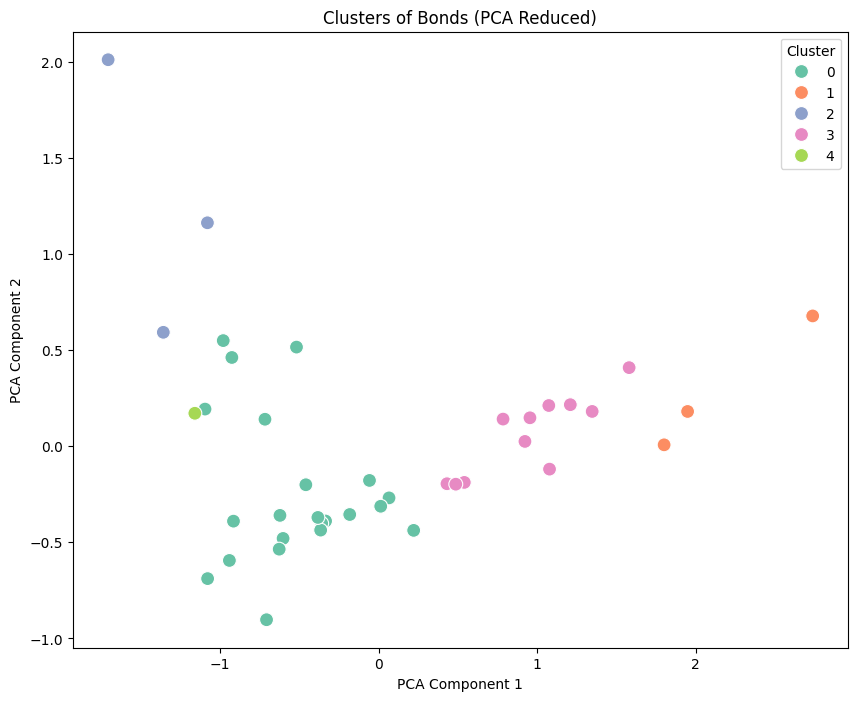

In [98]:
## look at line 89 for df_filtreed
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Normalize the data (optional)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered.T), index=df_filtered.columns).T

# Perform K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_filtered.T)

# Create a DataFrame for clustered bonds
clustered_bonds = pd.DataFrame({"Bond": df_filtered.columns, "Cluster": clusters})

# PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_filtered.T)
clustered_bonds["PCA1"] = reduced_data[:, 0]
clustered_bonds["PCA2"] = reduced_data[:, 1]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=clustered_bonds, palette="Set2", s=100
)
plt.title("Clusters of Bonds (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Export results to Excel
# clustered_bonds.to_excel("clustered_bonds.xlsx", index=False)

In [102]:
grouped= clustered_bonds.groupby("Cluster")
for cluster_id, group in grouped:
    print(f"\nCluster {cluster_id}:")
    print(group)


Cluster 0:
                 Bond  Cluster      PCA1      PCA2
0   AT0000A24UY3 Corp        0 -0.707810 -0.902786
1   BE0002237064 Corp        0 -0.335245 -0.389027
3   BE0002629104 Corp        0 -0.359926 -0.401341
4   BE0002850312 Corp        0 -0.942171 -0.594283
5   BE6321718346 Corp        0 -0.916414 -0.389802
7   DE000A182VT2 Corp        0  0.065175 -0.268767
8   DE000A190NE4 Corp        0 -0.058176 -0.177922
9   DE000A19NS93 Corp        0 -0.603426 -0.479762
10  DE000A19X8A4 Corp        0  0.012743 -0.312286
12  DE000A1ZZ028 Corp        0 -0.518743  0.516014
13  DE000A289NE4 Corp        0 -1.079662 -0.688798
14  DE000A289NX4 Corp        0 -0.459695 -0.200385
15  DE000A289RN6 Corp        0 -0.926539  0.461969
18  DE000A2DADM7 Corp        0 -0.981077  0.549794
25  DE000A3KNP88 Corp        0 -1.095979  0.193445
26  DE000A3LBGG1 Corp        0 -0.366317 -0.436359
28  DE000A3LGGL0 Corp        0 -0.623099 -0.359788
30  DE000A3LHK72 Corp        0 -0.628015 -0.535584
34  DE000A3LWGE2 Co

In [103]:
##@ we know we will look for stat arb
from itertools import combinations
# Group bonds by clusters
bonds_by_cluster = clustered_bonds.groupby("Cluster")["Bond"].apply(list).to_dict()

# Display bonds in each cluster
for cluster_id, bonds in bonds_by_cluster.items():
    print(f"Cluster {cluster_id}: {bonds}")

# Within each cluster, compute the spreads for all possible pairs of bonds. This reduces the computation compared to analyzing all bonds.

# Dictionary to store spreads for each cluster
cluster_spreads = {}

for cluster_id, bonds in bonds_by_cluster.items():
    # Generate all possible pairs within the cluster
    bond_pairs = list(combinations(bonds, 2))
    cluster_spreads[cluster_id] = {}
    
    # Compute spreads for each pair
    for bond_1, bond_2 in bond_pairs:
        spread = df_filtered[bond_1] - df_filtered[bond_2]
        cluster_spreads[cluster_id][(bond_1, bond_2)] = spread

# Example: Display spreads for a specific cluster
print("\nCluster 0 Spreads:")
for pair, spread in cluster_spreads[0].items():
    print(f"Pair {pair}: Spread (first 5 values):\n{spread.head()}")


Cluster 0: ['AT0000A24UY3 Corp', 'BE0002237064 Corp', 'BE0002629104 Corp', 'BE0002850312 Corp', 'BE6321718346 Corp', 'DE000A182VT2 Corp', 'DE000A190NE4 Corp', 'DE000A19NS93 Corp', 'DE000A19X8A4 Corp', 'DE000A1ZZ028 Corp', 'DE000A289NE4 Corp', 'DE000A289NX4 Corp', 'DE000A289RN6 Corp', 'DE000A2DADM7 Corp', 'DE000A3KNP88 Corp', 'DE000A3LBGG1 Corp', 'DE000A3LGGL0 Corp', 'DE000A3LHK72 Corp', 'DE000A3LWGE2 Corp', 'DE000A3MP4T1 Corp', 'ES0205032024 Corp', 'ES0305523005 Corp']
Cluster 1: ['BE0002433085 Corp', 'DE000A3H2TW4 Corp', 'ES0205046008 Corp']
Cluster 2: ['DE000A14KJF5 Corp', 'DE000A1ZY989 Corp', 'DE000A2RWZZ6 Corp']
Cluster 3: ['DE000A289XJ2 Corp', 'DE000A2AAL31 Corp', 'DE000A2RYD91 Corp', 'DE000A2YNZW8 Corp', 'DE000A30VPL3 Corp', 'DE000A3E5L98 Corp', 'DE000A3LBMY2 Corp', 'DE000A3LH6T7 Corp', 'DE000A3LQ9S2 Corp', 'DE000A3LSYG8 Corp', 'DE000A3LT431 Corp']
Cluster 4: ['ES0211845294 Corp']

Cluster 0 Spreads:
Pair ('AT0000A24UY3 Corp', 'BE0002237064 Corp'): Spread (first 5 values):
1   -0

In [108]:
####  we will be cotinuing here:

# Extract correlated pairs into a list
correlated_pairs = df_high_corr_pairs[["Bond_1", "Bond_2"]].values.tolist()




# Extract clustered pairs into a list
clustered_pairs = []

for cluster_id, bonds in bonds_by_cluster.items():
    clustered_pairs.extend(list(combinations(bonds, 2)))  # All pair combinations within each cluster

# Display clustered pairs
print("Clustered Pairs:")
for pair in clustered_pairs[:10]:  # Display the first 10 for brevity
    print(pair)

print(f"Total Clustered Pairs: {len(clustered_pairs)}")

for pair in correlated_pairs[:10]:
    print(pair)

print(f"Total Clustered Pairs: {len(correlated_pairs)}")

Clustered Pairs:
('AT0000A24UY3 Corp', 'BE0002237064 Corp')
('AT0000A24UY3 Corp', 'BE0002629104 Corp')
('AT0000A24UY3 Corp', 'BE0002850312 Corp')
('AT0000A24UY3 Corp', 'BE6321718346 Corp')
('AT0000A24UY3 Corp', 'DE000A182VT2 Corp')
('AT0000A24UY3 Corp', 'DE000A190NE4 Corp')
('AT0000A24UY3 Corp', 'DE000A19NS93 Corp')
('AT0000A24UY3 Corp', 'DE000A19X8A4 Corp')
('AT0000A24UY3 Corp', 'DE000A1ZZ028 Corp')
('AT0000A24UY3 Corp', 'DE000A289NE4 Corp')
Total Clustered Pairs: 292
['DE000A182VT2 Corp', 'DE000A19X8A4 Corp']
['DE000A3H2TW4 Corp', 'ES0205046008 Corp']
['DE000A289XJ2 Corp', 'DE000A2YNZW8 Corp']
['DE000A3LQ9S2 Corp', 'DE000A3LSYG8 Corp']
['DE000A30VPL3 Corp', 'DE000A3E5L98 Corp']
['DE000A30VPL3 Corp', 'DE000A3LQ9S2 Corp']
['DE000A30VPL3 Corp', 'DE000A3LSYG8 Corp']
['DE000A3E5L98 Corp', 'DE000A3H2TW4 Corp']
['DE000A3LBMY2 Corp', 'DE000A3LSYG8 Corp']
['DE000A3E5L98 Corp', 'DE000A3LSYG8 Corp']
Total Clustered Pairs: 231


In [110]:
### test cointegration for each:

# Dictionary to store cointegrated correlated pairs
cointegrated_correlated_pairs = []

for bond_1, bond_2 in correlated_pairs:
    # Test for cointegration
    score, p_value, _ = coint(df_filtered[bond_1], df_filtered[bond_2])
    
    # If p-value < 0.05, the pair is cointegrated
    if p_value < 0.05:
        cointegrated_correlated_pairs.append({
            "Bond_1": bond_1,
            "Bond_2": bond_2,
            "P-Value": p_value
        })

# Convert to DataFrame
cointegrated_correlated_pairs_df = pd.DataFrame(cointegrated_correlated_pairs)

# Display results
print("Cointegrated Correlated Pairs:")
print(cointegrated_correlated_pairs_df)


# Dictionary to store cointegrated clustered pairs
cointegrated_clustered_pairs = []

for bond_1, bond_2 in clustered_pairs:
    # Test for cointegration
    score, p_value, _ = coint(df_filtered[bond_1], df_filtered[bond_2])
    
    # If p-value < 0.05, the pair is cointegrated
    if p_value < 0.05:
        cointegrated_clustered_pairs.append({
            "Bond_1": bond_1,
            "Bond_2": bond_2,
            "P-Value": p_value
        })

# Convert to DataFrame
cointegrated_clustered_pairs_df = pd.DataFrame(cointegrated_clustered_pairs)

# Display results
print("Cointegrated Clustered Pairs:")
print(cointegrated_clustered_pairs_df)


Cointegrated Correlated Pairs:
                Bond_1             Bond_2       P-Value
0    DE000A182VT2 Corp  DE000A19X8A4 Corp  3.554681e-12
1    DE000A3H2TW4 Corp  ES0205046008 Corp  3.050807e-26
2    DE000A289XJ2 Corp  DE000A2YNZW8 Corp  4.620743e-29
3    DE000A3LQ9S2 Corp  DE000A3LSYG8 Corp  1.839036e-26
4    DE000A30VPL3 Corp  DE000A3E5L98 Corp  2.896956e-28
..                 ...                ...           ...
226  DE000A289NX4 Corp  DE000A289XJ2 Corp  8.513918e-08
227  DE000A289NX4 Corp  DE000A3E5L98 Corp  6.675365e-13
228  DE000A289NX4 Corp  DE000A2YNZW8 Corp  3.686976e-12
229  BE0002433085 Corp  DE000A30VPL3 Corp  2.227150e-29
230  DE000A3E5L98 Corp  DE000A3LWGE2 Corp  7.854763e-03

[231 rows x 3 columns]
Cointegrated Clustered Pairs:
                Bond_1             Bond_2       P-Value
0    AT0000A24UY3 Corp  BE0002237064 Corp  2.012292e-27
1    AT0000A24UY3 Corp  BE0002629104 Corp  7.869847e-27
2    AT0000A24UY3 Corp  BE0002850312 Corp  3.071706e-25
3    AT0000A24UY3 C

In [ ]:
### EXPORT:
# Export correlated pairs
#cointegrated_correlated_pairs_df.to_excel("cointegrated_correlated_pairs.xlsx", index=False)

# Export clustered pairs
#cointegrated_clustered_pairs_df.to_excel("cointegrated_clustered_pairs.xlsx", index=False)

In [104]:
### this was supposed to be the continuity of cell 103
#### kh@

###@@@@@@@@@@@@@@@@@@@@@@
#For each pair of bonds within a cluster, test for cointegration to ensure a long-term equilibrium relationship.


from statsmodels.tsa.stattools import coint

# Dictionary to store cointegrated pairs
cointegrated_pairs = {}

for cluster_id, spreads in cluster_spreads.items():
    cointegrated_pairs[cluster_id] = []
    
    for pair, spread in spreads.items():
        bond_1, bond_2 = pair
        # Test for cointegration
        score, p_value, _ = coint(df_filtered[bond_1], df_filtered[bond_2])
        if p_value < 0.05:  # 5% significance level
            cointegrated_pairs[cluster_id].append(pair)

# Example: Display cointegrated pairs for a specific cluster
print("\nCointegrated Pairs in Cluster 0:")
print(cointegrated_pairs[0])


Cointegrated Pairs in Cluster 0:
[('AT0000A24UY3 Corp', 'BE0002237064 Corp'), ('AT0000A24UY3 Corp', 'BE0002629104 Corp'), ('AT0000A24UY3 Corp', 'BE0002850312 Corp'), ('AT0000A24UY3 Corp', 'BE6321718346 Corp'), ('AT0000A24UY3 Corp', 'DE000A182VT2 Corp'), ('AT0000A24UY3 Corp', 'DE000A190NE4 Corp'), ('AT0000A24UY3 Corp', 'DE000A19NS93 Corp'), ('AT0000A24UY3 Corp', 'DE000A19X8A4 Corp'), ('AT0000A24UY3 Corp', 'DE000A1ZZ028 Corp'), ('AT0000A24UY3 Corp', 'DE000A289NE4 Corp'), ('AT0000A24UY3 Corp', 'DE000A289NX4 Corp'), ('AT0000A24UY3 Corp', 'DE000A289RN6 Corp'), ('AT0000A24UY3 Corp', 'DE000A2DADM7 Corp'), ('AT0000A24UY3 Corp', 'DE000A3KNP88 Corp'), ('AT0000A24UY3 Corp', 'DE000A3LBGG1 Corp'), ('AT0000A24UY3 Corp', 'DE000A3LGGL0 Corp'), ('AT0000A24UY3 Corp', 'DE000A3LHK72 Corp'), ('AT0000A24UY3 Corp', 'DE000A3LWGE2 Corp'), ('AT0000A24UY3 Corp', 'DE000A3MP4T1 Corp'), ('AT0000A24UY3 Corp', 'ES0205032024 Corp'), ('AT0000A24UY3 Corp', 'ES0305523005 Corp'), ('BE0002237064 Corp', 'BE0002629104 Corp'

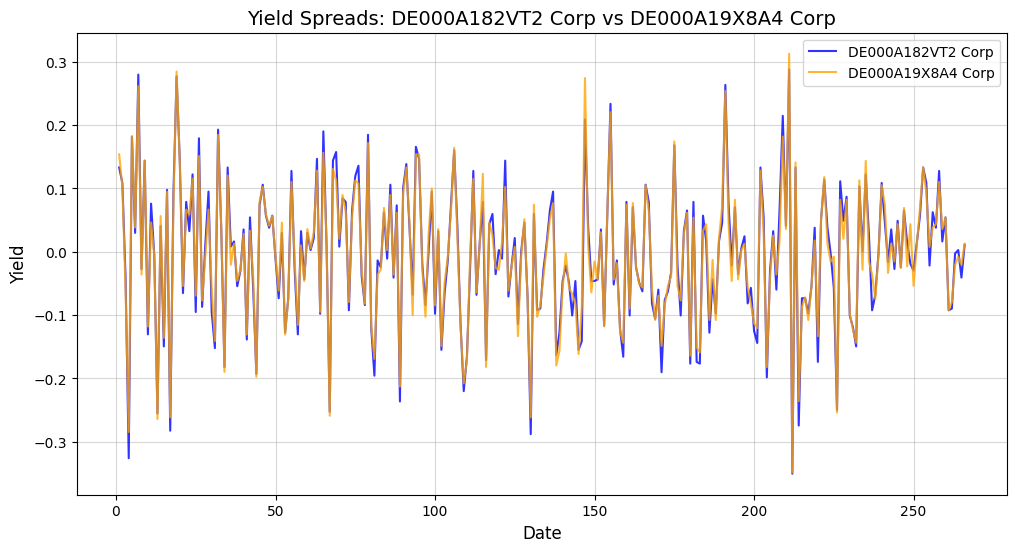

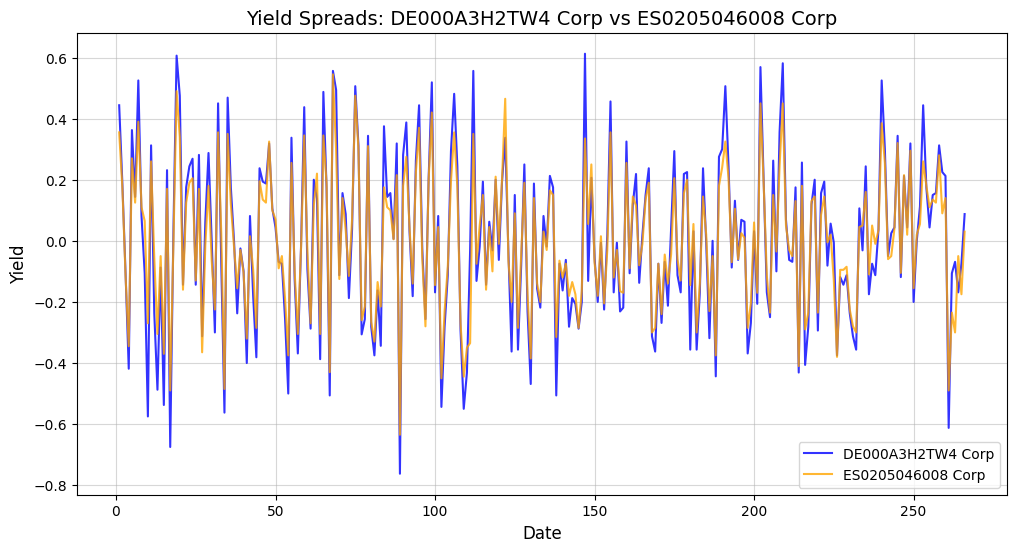

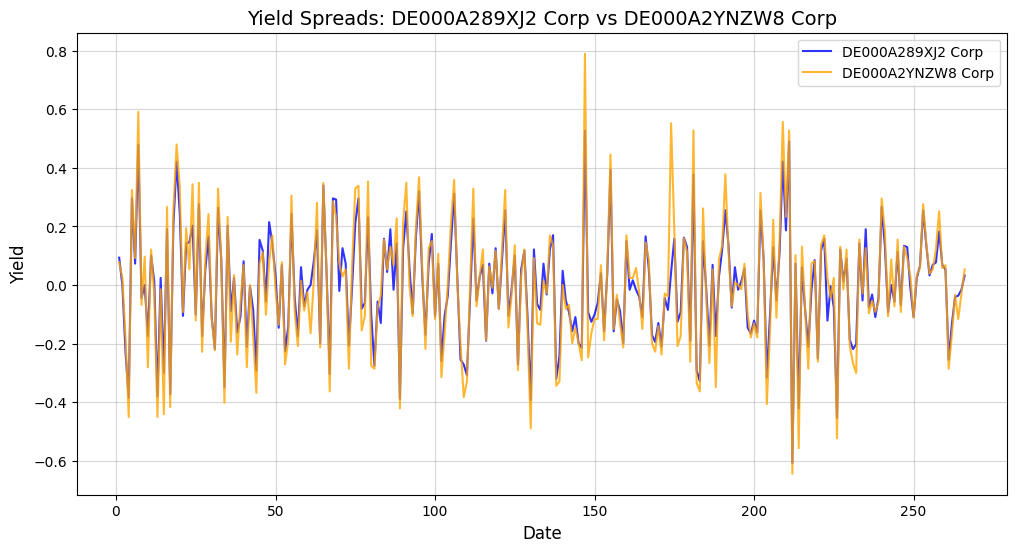

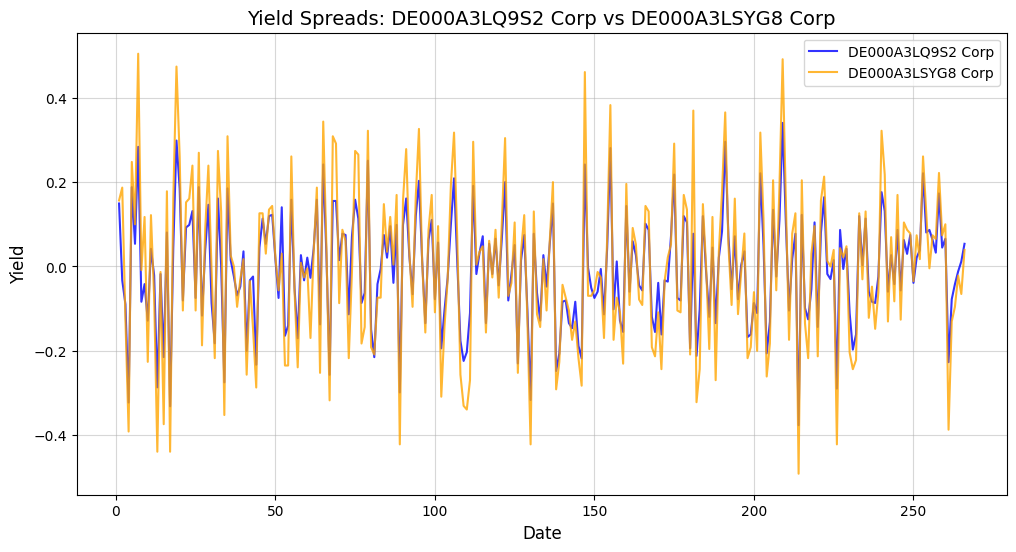

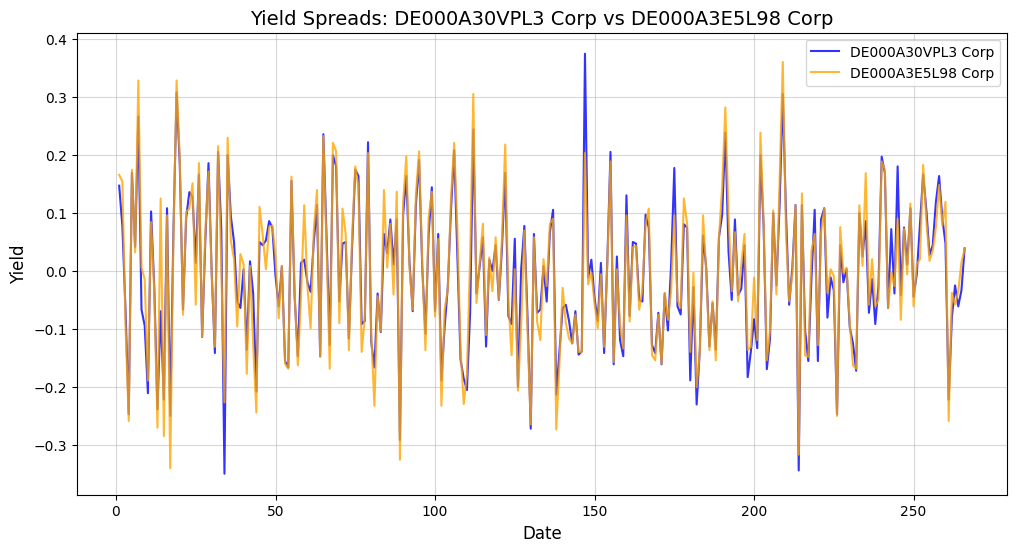

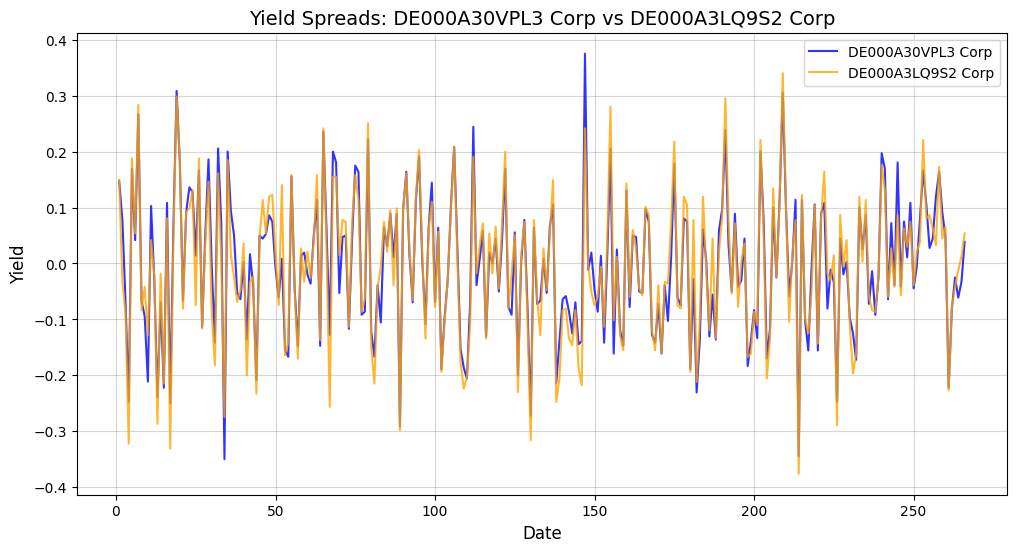

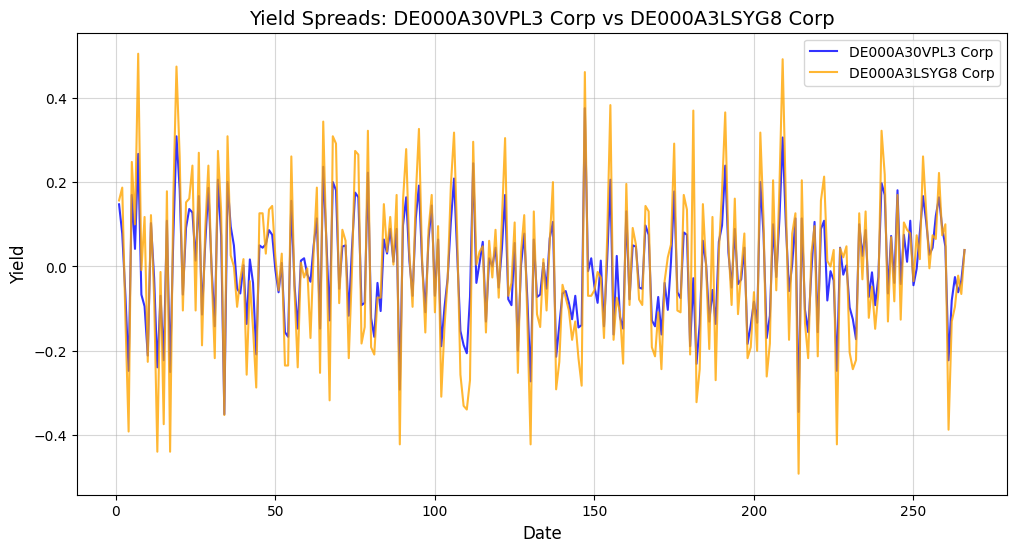

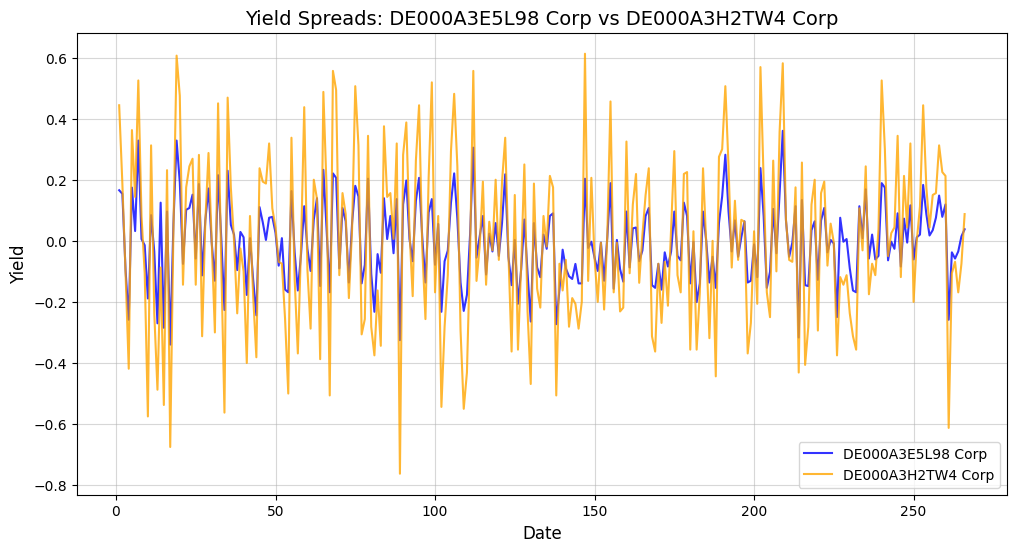

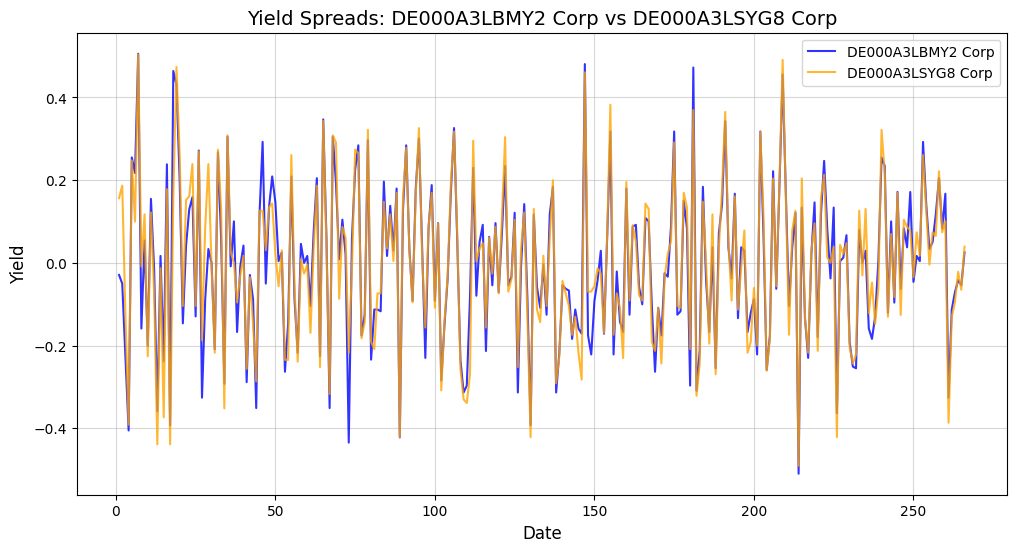

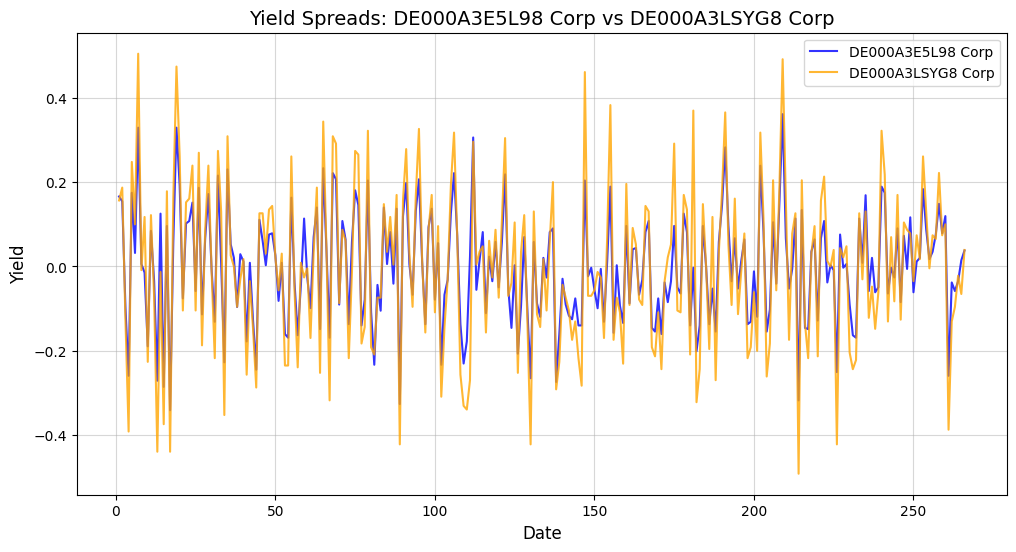

In [117]:
import matplotlib.pyplot as plt

# Function to plot original data for a pair
def plot_pair(pair, original_data):
    bond_1, bond_2 = pair
    plt.figure(figsize=(12, 6))
    
    # Plot the yields for both bonds with colors
    plt.plot(original_data.index, original_data[bond_1], label=bond_1, alpha=0.8, color="blue")
    plt.plot(original_data.index, original_data[bond_2], label=bond_2, alpha=0.8, color="orange")
    
    # Add titles, labels, and grid
    plt.title(f"Yield Spreads: {bond_1} vs {bond_2}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Yield", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.5)
    plt.show()


pairs_to_plot = cointegrated_correlated_pairs_df[["Bond_1", "Bond_2"]].values[:10]
for pair in pairs_to_plot:
    plot_pair(pair, df_filtered)  # Replace df_filtered with your original (non-differenced) dataset



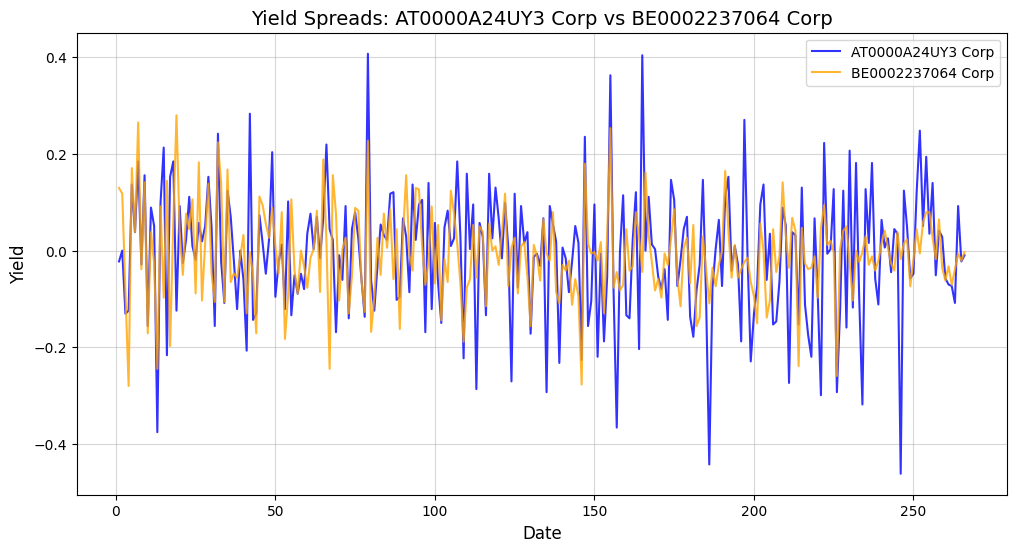

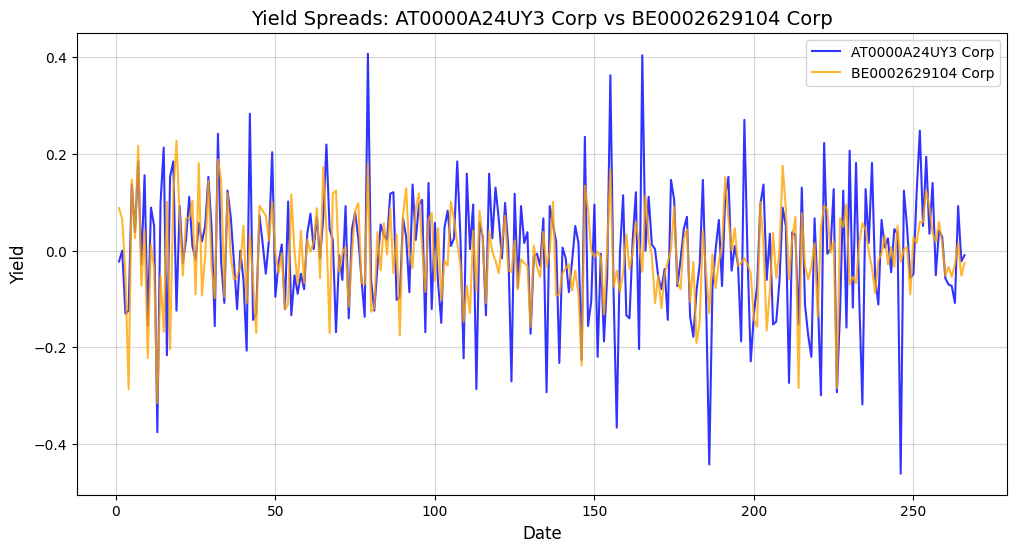

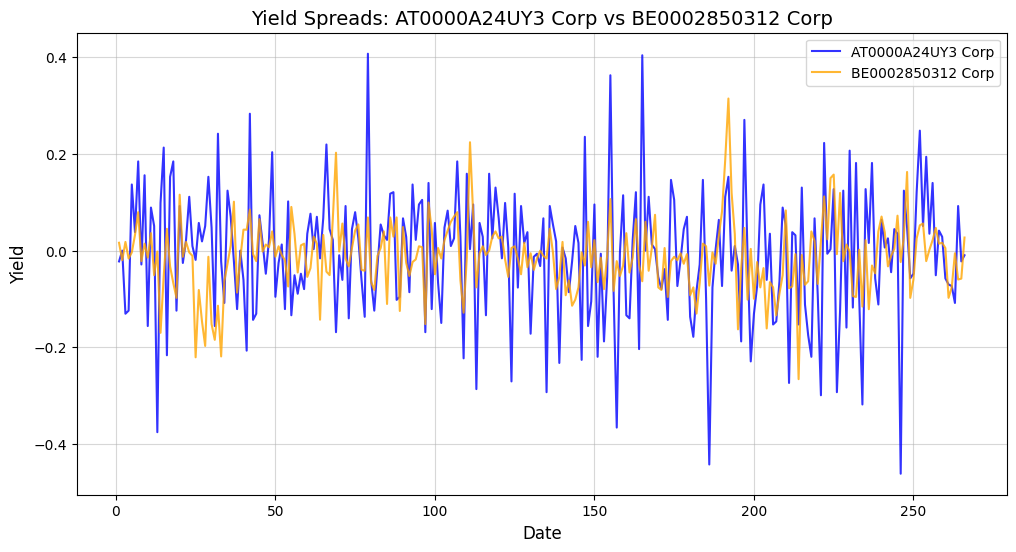

In [112]:
pairs_to_plot = cointegrated_clustered_pairs_df[["Bond_1", "Bond_2"]].values[:3]
for pair in pairs_to_plot:
    plot_pair(pair, df_filtered)  # Replace df_filtered with your original (non-differenced) dataset

In [105]:
# Function to calculate Z-score
def calculate_z_score(spread):
    return (spread - spread.mean()) / spread.std()

# Dictionary to store Z-scores for cointegrated pairs
z_scores = {}

for cluster_id, pairs in cointegrated_pairs.items():
    z_scores[cluster_id] = {}
    
    for pair in pairs:
        spread = cluster_spreads[cluster_id][pair]
        z_scores[cluster_id][pair] = calculate_z_score(spread)

# Example: Display Z-scores for a specific pair in Cluster 0
example_pair = list(z_scores[0].keys())[0]
print(f"\nZ-Score for Pair {example_pair} in Cluster 0:")
print(z_scores[0][example_pair].head())






Z-Score for Pair ('AT0000A24UY3 Corp', 'BE0002237064 Corp') in Cluster 0:
1   -1.220275
2   -0.948733
3   -0.368142
4    1.232870
5   -0.280647
dtype: float64


## why check stationnarity:
https://chatgpt.com/c/67956ff6-5960-8010-99e7-f1f72a969c8a#:~:text=Why%20Check%20Stationarity%20Before%20Computing%20Spreads%3F

## serous problem:
https://chatgpt.com/c/67956ff6-5960-8010-99e7-f1f72a969c8a#:~:text=this%20is%20a,correlation%2C%20clustering%20etc..


## the process and why are doing it
Of course! Let’s break it down step by step, focusing on why each step is important, how it differs from the others, and what each one adds to the process of pair selection for statistical arbitrage.
https://chatgpt.com/c/67956ff6-5960-8010-99e7-f1f72a969c8a#:~:text=Of%20course!%20Let%E2%80%99s%20break%20it%20down%20step%20by%20step%2C%20focusing%20on%20why%20each%20step%20is%20important%2C%20how%20it%20differs%20from%20the%20others%2C%20and%20what%20each%20one%20adds%20to%20the%20process%20of%20pair%20selection%20for%20statistical%20arbitrage.
# what wil happen if we don't normalise for clustering, considering that we already stationarised
# https://chatgpt.com/c/67956ff6-5960-8010-99e7-f1f72a969c8a#:~:text=what%20will%20happen%20if%20we%20don%27t%20normalise%20%3F%20considering%20that%20we%20already%20stationnarised%20%3F

## 